In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [3]:
from pandas_datareader import data as pdr

aapl = pdr.get_data_yahoo("AAPL",
                         start = datetime.datetime(2000, 1,1),
                         end = datetime.datetime(2019, 7, 1))

### Common Financial Analysis

In [5]:
# Assign `Adj Close` to `daily_close`
daily_close = aapl[['Adj Close']]

# Daily returns
daily_pct_c = daily_close.pct_change()

# Replace NA values with 0
daily_pct_c.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_c)

            Adj Close
Date                 
1999-12-31   0.000000
2000-01-03   0.088754
2000-01-04  -0.084311
2000-01-05   0.014634
2000-01-06  -0.086538
2000-01-07   0.047369
2000-01-10  -0.017588
2000-01-11  -0.051151
2000-01-12  -0.059973
2000-01-13   0.109677
2000-01-14   0.038114
2000-01-18   0.034848
2000-01-19   0.025256
2000-01-20   0.065103
2000-01-21  -0.019273
2000-01-24  -0.045480
2000-01-25   0.056470
2000-01-26  -0.018374
2000-01-27  -0.001702
2000-01-28  -0.076136
2000-01-31   0.020910
2000-02-01  -0.033735
2000-02-02  -0.014339
2000-02-03   0.045541
2000-02-04   0.045372
2000-02-07   0.056134
2000-02-08   0.007124
2000-02-09  -0.019587
2000-02-10   0.007769
2000-02-11  -0.041850
...               ...
2019-05-20  -0.031270
2019-05-21   0.019171
2019-05-22  -0.020472
2019-05-23  -0.017070
2019-05-24  -0.003841
2019-05-28  -0.004135
2019-05-29  -0.004769
2019-05-30   0.005187
2019-05-31  -0.018116
2019-06-03  -0.010110
2019-06-04   0.036584
2019-06-05   0.016143
2019-06-06

In [6]:
# Resample `aapl` to business months, take last observation as value 
monthly = aapl.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-31,0.009721,-0.050251,0.000619,0.009119,3.283468,0.009119
2000-02-29,0.128761,0.191138,0.124381,0.104819,-0.474174,0.104819
2000-03-31,0.170576,0.119378,0.122179,0.184842,0.096682,0.184842
2000-04-28,-0.071038,-0.037202,-0.002452,-0.086516,-0.383193,-0.086516
2000-05-31,-0.284314,-0.309119,-0.316618,-0.322922,0.736941,-0.322922
2000-06-30,0.204110,0.233408,0.215827,0.247024,-0.254689,0.247024
2000-07-31,-0.060296,-0.056832,-0.069231,-0.029833,-0.519343,-0.029833
2000-08-31,0.191283,0.208974,0.199619,0.199262,1.701861,0.199262


In [7]:
# Resample `aapl` to quarters, take the mean as value per quarter
quarter = aapl.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-30,0.174827,0.136824,0.156150,0.138055,1.772058,0.138055
2000-08-31,-0.126607,-0.119700,-0.120783,-0.126768,-0.258450,-0.126768
2000-12-31,-0.460643,-0.464300,-0.461876,-0.462862,0.923872,-0.462862
2001-04-30,-0.261648,-0.263779,-0.265517,-0.257365,-0.196358,-0.257365
2001-08-31,0.037916,0.055707,0.050774,0.043148,-0.362147,0.043148
2001-12-31,-0.113057,-0.112897,-0.117949,-0.110392,-0.120420,-0.110392
2002-04-30,0.253067,0.265122,0.262953,0.259068,0.172956,0.259068
2002-08-31,-0.207571,-0.211864,-0.206908,-0.211283,-0.051261,-0.211283


In [8]:
# Daily returns
daily_pct_c = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_c`
print(daily_pct_c)

            Adj Close
Date                 
1999-12-31        NaN
2000-01-03   0.088754
2000-01-04  -0.084311
2000-01-05   0.014634
2000-01-06  -0.086538
2000-01-07   0.047369
2000-01-10  -0.017588
2000-01-11  -0.051151
2000-01-12  -0.059973
2000-01-13   0.109677
2000-01-14   0.038114
2000-01-18   0.034848
2000-01-19   0.025256
2000-01-20   0.065103
2000-01-21  -0.019273
2000-01-24  -0.045480
2000-01-25   0.056470
2000-01-26  -0.018374
2000-01-27  -0.001702
2000-01-28  -0.076136
2000-01-31   0.020910
2000-02-01  -0.033735
2000-02-02  -0.014339
2000-02-03   0.045541
2000-02-04   0.045372
2000-02-07   0.056134
2000-02-08   0.007124
2000-02-09  -0.019587
2000-02-10   0.007769
2000-02-11  -0.041850
...               ...
2019-05-20  -0.031270
2019-05-21   0.019171
2019-05-22  -0.020472
2019-05-23  -0.017070
2019-05-24  -0.003841
2019-05-28  -0.004135
2019-05-29  -0.004769
2019-05-30   0.005187
2019-05-31  -0.018116
2019-06-03  -0.010110
2019-06-04   0.036584
2019-06-05   0.016143
2019-06-06

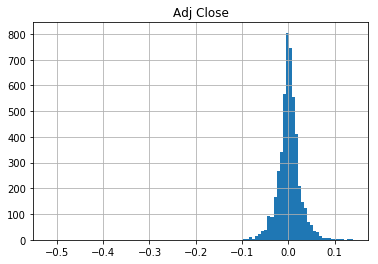

         Adj Close
count  4904.000000
mean      0.001189
std       0.025645
min      -0.518692
25%      -0.010455
50%       0.000833
75%       0.012973
max       0.139049


In [13]:
# Plot the distribution of `daily_pct_c`
daily_pct_c.hist(bins=100)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_c.describe())

In [14]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_c).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)

            Adj Close
Date                 
1999-12-31        NaN
2000-01-03   1.088754
2000-01-04   0.996961
2000-01-05   1.011550
2000-01-06   0.924012
2000-01-07   0.967781
2000-01-10   0.950760
2000-01-11   0.902128
2000-01-12   0.848025
2000-01-13   0.941034
2000-01-14   0.976900
2000-01-18   1.010943
2000-01-19   1.036474
2000-01-20   1.103952
2000-01-21   1.082675
2000-01-24   1.033435
2000-01-25   1.091794
2000-01-26   1.071733
2000-01-27   1.069909
2000-01-28   0.988450
2000-01-31   1.009119
2000-02-01   0.975076
2000-02-02   0.961095
2000-02-03   1.004863
2000-02-04   1.050456
2000-02-07   1.109423
2000-02-08   1.117326
2000-02-09   1.095441
2000-02-10   1.103952
2000-02-11   1.057751
...               ...
2019-05-20  56.919140
2019-05-21  58.010334
2019-05-22  56.822768
2019-05-23  55.852821
2019-05-24  55.638313
2019-05-28  55.408260
2019-05-29  55.144014
2019-05-30  55.430023
2019-05-31  54.425880
2019-06-03  53.875620
2019-06-04  55.846602
2019-06-05  56.748154
2019-06-06

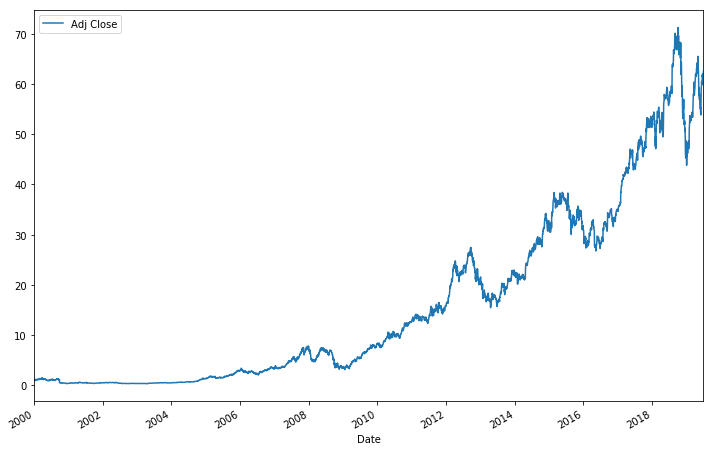

In [15]:
# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()

In [16]:
# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()

# Print the `cum_monthly_return`
print(cum_monthly_return)

            Adj Close
Date                 
1999-12-31        NaN
2000-01-31   1.005319
2000-02-29   1.085844
2000-03-31   1.249875
2000-04-30   1.197377
2000-05-31   0.980527
2000-06-30   0.955209
2000-07-31   1.045775
2000-08-31   0.998163
2000-09-30   1.084605
2000-10-31   0.400221
2000-11-30   0.380229
2000-12-31   0.291185
2001-01-31   0.358605
2001-02-28   0.381891
2001-03-31   0.403687
2001-04-30   0.441931
2001-05-31   0.457753
2001-06-30   0.418839
2001-07-31   0.417505
2001-08-31   0.362729
2001-09-30   0.322957
2001-10-31   0.336966
2001-11-30   0.382231
2001-12-31   0.422030
2002-01-31   0.439765
2002-02-28   0.463327
2002-03-31   0.471587
2002-04-30   0.477754
2002-05-31   0.469115
...               ...
2017-02-28  40.100160
2017-03-31  42.226498
2017-04-30  42.907868
2017-05-31  45.834119
2017-06-30  44.575905
2017-07-31  44.717066
2017-08-31  48.081747
2017-09-30  47.710653
2017-10-31  47.773851
2017-11-30  52.315136
2017-12-31  52.221406
2018-01-31  52.863569
2018-02-28

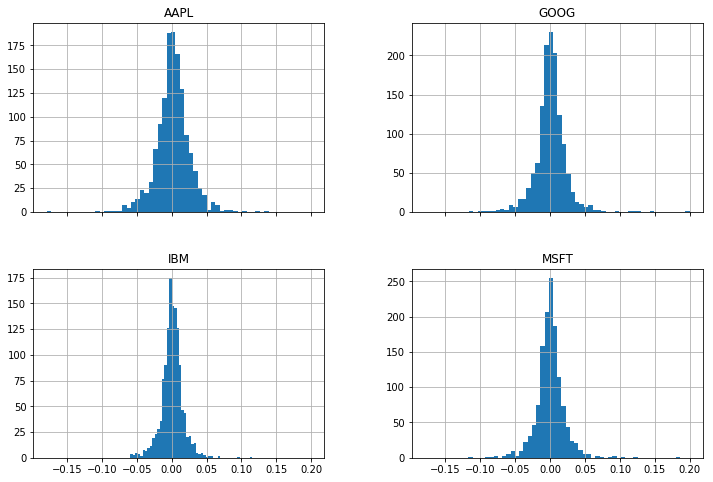

In [17]:
def get(tickers, startdate, enddate):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))

daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

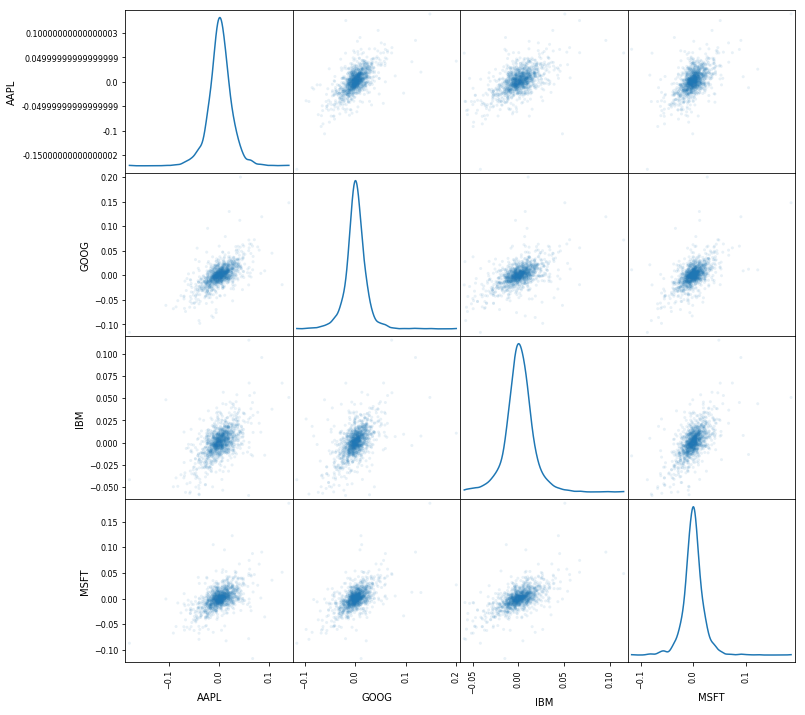

In [18]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()